**KNN with Python**

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

Show a summary of the dataset using pandas


In [ ]:
import numpy as np
import pandas as pd 
data = pd.DataFrame(cancer.data, columns = [cancer.feature_names])
data ['Target'] = pd.Series (data=cancer.target, index = data.index)
print("target indexes and target names are %s" %(list(zip(list(set(cancer.target)), cancer.target_names))))
data.head()

target indexes and target names are [(0, 'malignant'), (1, 'benign')]


mean radius mean texture  ... worst fractal dimension Target
0       17.99        10.38  ...                 0.11890      0
1       20.57        17.77  ...                 0.08902      0
2       19.69        21.25  ...                 0.08758      0
3       11.42        20.38  ...                 0.17300      0
4       20.29        14.34  ...                 0.07678      0

[5 rows x 31 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (mean radius,)              569 non-null    float64
 1   (mean texture,)             569 non-null    float64
 2   (mean perimeter,)           569 non-null    float64
 3   (mean area,)                569 non-null    float64
 4   (mean smoothness,)          569 non-null    float64
 5   (mean compactness,)         569 non-null    float64
 6   (mean concavity,)           569 non-null    float64
 7   (mean concave points,)      569 non-null    float64
 8   (mean symmetry,)            569 non-null    float64
 9   (mean fractal dimension,)   569 non-null    float64
 10  (radius error,)             569 non-null    float64
 11  (texture error,)            569 non-null    float64
 12  (perimeter error,)          569 non-null    float64
 13  (area error,)               569 non

In [ ]:
data.describe()

mean radius mean texture  ... worst fractal dimension      Target
count  569.000000   569.000000  ...              569.000000  569.000000
mean    14.127292    19.289649  ...                0.083946    0.627417
std      3.524049     4.301036  ...                0.018061    0.483918
min      6.981000     9.710000  ...                0.055040    0.000000
25%     11.700000    16.170000  ...                0.071460    0.000000
50%     13.370000    18.840000  ...                0.080040    1.000000
75%     15.780000    21.800000  ...                0.092080    1.000000
max     28.110000    39.280000  ...                0.207500    1.000000

[8 rows x 31 columns]

**K-nearest neighbors**

Create the classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

Perform a 5CV on the breast cancer dataset

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
# Perform a 5 fold cross validation
scores = cross_val_score(knn, cancer.data, cancer.target, cv = 5)
print ("Cross-validated scores :", scores)
print ("Average 5CV score is %f +- %f" %(scores.mean(), scores.std()))

Cross-validated scores : [0.88596491 0.93859649 0.93859649 0.94736842 0.92920354]
Average 5CV score is 0.927946 +- 0.021763


**Effect of the number of nearest neighbors**

We'll create a train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

Then, we'll get the accuracy of KNN with higher numbers of neighbors and plot the results

Question : 
Try the same code with higher values for max_k

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline 

## K will vary from 1 to a max_k value
max_k=20
max_k+=1
accuracy = []
for n in range(1,max_k):
  knn = KNeighborsClassifier(n_neighbors = n)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))
# Plotting the accuracy for different values of k
print(accuracy)
plt.figure(figsize=(10,5))
plt.plot(range(1,max_k), accuracy, label = "KNN Accuracy", marker = 'o', markerfacecolor ='blue', color = 'skyblue', linewidth =4)
plt.legend()


[0.916083916083916, 0.916083916083916, 0.9090909090909091, 0.9230769230769231, 0.916083916083916, 0.916083916083916, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9300699300699301, 0.916083916083916, 0.9300699300699301, 0.9300699300699301, 0.9300699300699301, 0.9300699300699301, 0.9300699300699301, 0.9300699300699301, 0.9300699300699301, 0.9300699300699301, 0.9300699300699301]


**Effect of the weight on the distance**

[0.916083916083916, 0.916083916083916, 0.9090909090909091, 0.9230769230769231, 0.916083916083916, 0.916083916083916, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9300699300699301, 0.916083916083916, 0.9300699300699301, 0.9300699300699301, 0.9300699300699301, 0.9300699300699301, 0.9300699300699301, 0.9300699300699301, 0.9300699300699301, 0.9300699300699301, 0.9300699300699301, 0.9300699300699301, 0.9300699300699301, 0.9300699300699301, 0.9300699300699301, 0.9230769230769231, 0.9230769230769231, 0.916083916083916, 0.9230769230769231, 0.916083916083916, 0.9230769230769231, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9020979020979021, 0.916083916083916, 0.916083916083916, 0.9230769230769231, 0.9090909090909091, 0.916083916083916, 0.916083916083916, 0.916083916083916, 0.916083916083916, 0.916083916083916, 0.916083916083916, 0.916083916083916, 0.916083916083916, 0.916083916083916, 0.916083916083916, 0.916083916083916]


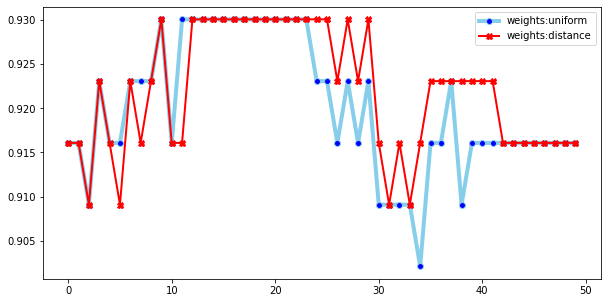

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

## K will vary from 1 to a max_k value
max_k= 50
max_k+=1
accuracy, accuracy2 = [], []
for n in range(1,max_k) :
  knn = KNeighborsClassifier(n_neighbors = n, weights ="uniform")
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))

  knn = KNeighborsClassifier(n_neighbors = n, weights ="distance")
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy2.append(accuracy_score(y_test, y_pred))
 ## Plotting the accuracies for different values of k
print(accuracy)
plt.figure(figsize=(10,5))
plt.plot(accuracy, marker = 'o', markerfacecolor = 'blue', color = 'skyblue', linewidth =4, label = "weights:uniform")
plt.plot(accuracy2, marker = 'X', color = 'red', linewidth=2, label = "weights:distance")
plt.legend()


**Effect of the distance measure**

[0.916083916083916, 0.9300699300699301, 0.8951048951048951, 0.916083916083916]


Text(0, 0.5, 'Accuracy')

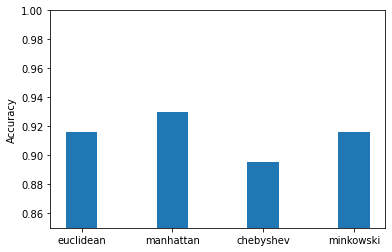

In [ ]:
from sklearn.metrics import accuracy_score

d_measures = ["euclidean", "manhattan", "chebyshev", "minkowski"]
accuracy= []
for d in d_measures : 
  knn = KNeighborsClassifier(metric=d)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))
## Plotting the accuracies for the different distance measures
print(accuracy)
plt.bar(d_measures, accuracy, width = 0.35)
plt.ylim([0.85, 1])
plt.ylabel('Accuracy')

**Effect of feature normalization**

Let's try measuring the accuracy again with feature normalization and compare

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import metrics

knn = KNeighborsClassifier()

# Normalize the data attributes
scaled_X = preprocessing.minmax_scale(cancer.data)

# Perform 5-fold cross validation
scores = cross_val_score(knn, cancer.data, cancer.target, cv=5)
print ("Cross-validated scores:", scores)
print ("Average 5CV score is %f +-%f(std)" %(scores.mean(), scores.std()))

# Perform 5-fold cross validation
scores = cross_val_score(knn, scaled_X, cancer.target, cv=5)
print ("Cross-validated scores (scaled):", scores)
print ("Average 5CV score (scaled) is %f +-%f(std)" %(scores.mean(), scores.std()))
                                  
                                  


Cross-validated scores: [0.88596491 0.93859649 0.93859649 0.94736842 0.92920354]
Average 5CV score is 0.927946 +-0.021763(std)
Cross-validated scores (scaled): [0.95614035 0.95614035 0.99122807 0.95614035 0.97345133]
Average 5CV score (scaled) is 0.966620 +-0.014012(std)
